## 3. Box plots of cloud-class-filtered CRE

In [1]:
#%reset
#%whos
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib as mpl
import seaborn as sns

### Aiko's color dictionary

In [4]:
# https://github.com/aikovoigt/nawdex-hackathon/blob/master/dict_nawdexsims.py
# define dictionary for coloring resolutions
def colordictionary():
    # manually defined colors
    mymaroon= np.array([128,   0,   0])/255
    myred   = np.array([230,  25,  75])/255
    myorange= np.array([245, 130,  48])/255
    mymagenta=np.array([240, 50, 230 ])/255
    myolive = np.array([128, 128,   0])/255
    myteal  = np.array([  0, 128, 128])/255
    myblue  = np.array([  0, 130, 200])/255
    mynavy  = np.array([  0,   0, 128])/255

    return {'80' : mymaroon, '40' : myred, '20' : myorange, '10' : myolive, '5' : myteal, '2' : myblue}

farbe = colordictionary()

### Plot using the format from Method 1 in crebyclassGenerate.ipynb 
All cloud classes and all their values, not only statistics, would be in the same dataframe in this case.

### Plot using the format from Method 2 in crebyclassGenerate.ipynb 
Each cloud class has its own dataframe with all its values  in this case.

In [ ]:
# Load the CRE dataframes from their pickles.
B1_df = pd.read_pickle('cre_class1.pkl'); B2_df = pd.read_pickle('cre_class2.pkl')
B3_df = pd.read_pickle('cre_class3.pkl'); B4_df = pd.read_pickle('cre_class4.pkl')
B5_df = pd.read_pickle('cre_class5.pkl'); B6_df = pd.read_pickle('cre_class6.pkl')
B7_df = pd.read_pickle('cre_class7.pkl'); B8_df = pd.read_pickle('cre_class8.pkl')



0
          Cloud class  Resolution  LWCRE_toa  LWCRE_atm  LWCRE_sfc  SWCRE_toa  \
0                 1.0        80.0   7.408371   2.089348   5.319023        0.0   
1                 1.0        80.0   2.065826   1.479286   0.586540        0.0   
2                 1.0        80.0  15.903091  11.483948   4.419144        0.0   
3                 1.0        80.0   9.356567   5.858498   3.498070        0.0   
4                 1.0        80.0   8.682281   4.963791   3.718491        0.0   
...               ...         ...        ...        ...        ...        ...   
67615880          1.0         2.0   0.000000   0.000000   0.000000        0.0   
67615881          1.0         2.0   0.000000   0.000000   0.000000        0.0   
67615882          1.0         2.0   0.000000   0.000000   0.000000        0.0   
67615883          1.0         2.0   0.000000   0.000000   0.000000        0.0   
67615884          1.0         2.0   0.000000   0.000000   0.000000        0.0   

          SWCRE_atm  SWCR

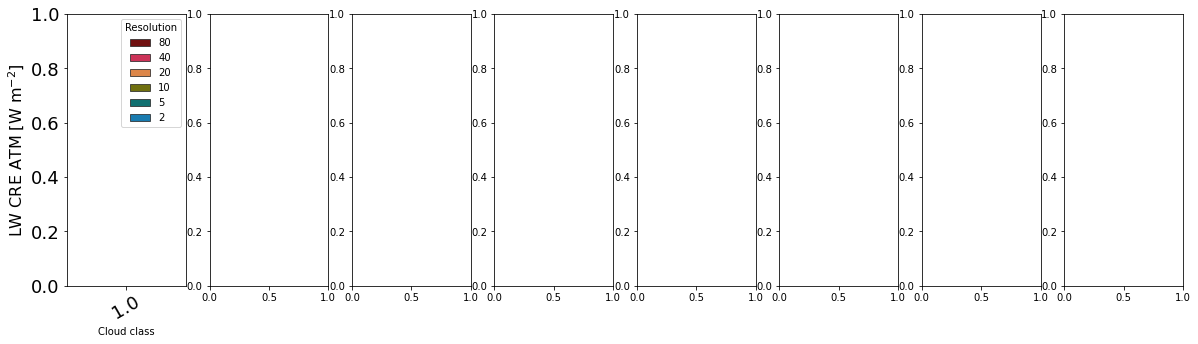

In [10]:
var = 'LWCRE_atm' # 'LWCRE_toa_','LWCRE_atm_','LWCRE_sfc','SWCRE_toa_','SWCRE_atm_','SWCRE_sfc_'
yl = 'LW CRE ATM'
ylim = [-70,125] # [-10,150],[-70,125],[-10,90],[-350,20],[-30,30],[-400,50]

fs = 13
resolutions = ['80','40','20','10','5','2']
class_names = ['HI','MED','LO','H-M','M-L','H-L','H-M-L','Clear-sky']
nclasses = 8
fig3b, ax3b = plt.subplots(nrows=1,ncols=8,figsize=(20,5))

for i in np.arange(1):
    print(i)
    B_df = pd.read_pickle('cre_class' + str(i+1) + '.pkl')
    print(B_df)
    sns.boxplot(x='Cloud class',y=var,hue='Resolution',data=B_df,\
                     hue_order=resolutions,palette=farbe,ax=ax3b[i])
    ax3b[i].set_xticklabels(ax3b[i].get_xticklabels(),rotation=30,fontsize=fs+5)
    ax3b[i].tick_params(axis="y", labelsize=fs+5)
    ax3b[i].set_ylabel(yl + r' [W m$^{-2}$]',fontsize=fs+3)
    #ax3b[i].set_xlabel('Cloud class',fontsize=fs+3)

### Plot using the format from Method 3 in crebyclassGenerate.ipynb
Each cloud class has its own dataframe with only its relevant statistics in this case.

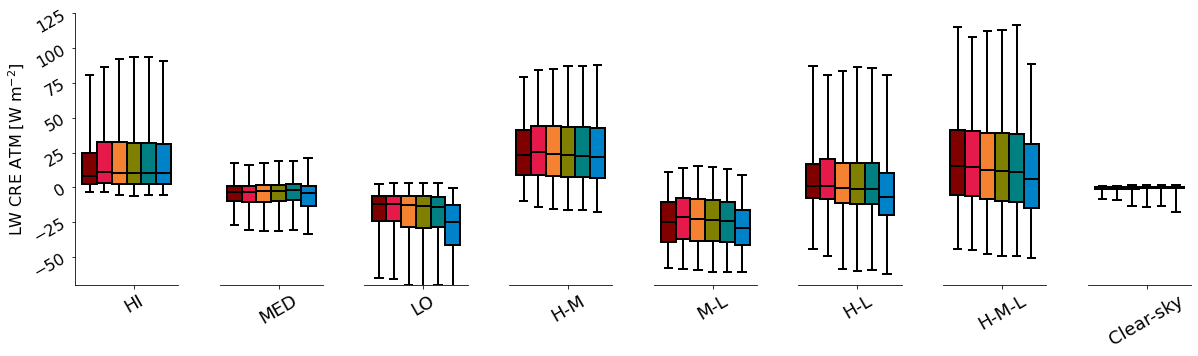

In [109]:
var = 'LWCRE_atm_' # 'LWCRE_toa_','LWCRE_atm_','LWCRE_sfc','SWCRE_toa_','SWCRE_atm_','SWCRE_sfc_'
yl = 'LW CRE ATM'
ylim = [-70,125] # [-10,150],[-70,125],[-10,90],[-350,20],[-30,30],[-400,50]

stats = []
fs = 13
fig3c, ax3c = plt.subplots(nrows=1,ncols=8,figsize=(20,5))

resolutions = ['80','40','20','10','5','2']
class_names = ['HI','MED','LO','H-M','M-L','H-L','H-M-L','Clear-sky']
nclasses = 8
pos = [1,1.5,2,2.5,3,3.5]
mpl.rcParams['patch.facecolor'] = farbe['80']

for cloud_class in np.arange(nclasses):
    stats = []
    B_df = pd.read_pickle('crestats_class' + str(cloud_class+1) + '.pkl')
    for r in resolutions:
        B2_df = B_df[(B_df['Resolution'] == int(r))]
        stats.append({'med': B2_df[var+'med'].values[0], 'q1': B2_df[var+'p25'].values[0], 'q3': B2_df[var+'p75'].values[0], \
              'whislo': B2_df[var+'p2'].values[0], 'whishi': B2_df[var+'p98'].values[0]})
        
    whiskerprops = dict(color='k',linewidth=2)
    capprops = dict(color='k',linewidth=2)
    medianprops = dict(color='k',linewidth=2)
    boxplot_items = ax3c[cloud_class].bxp(stats,patch_artist=True,showfliers=False,positions=pos,widths=0.5,\
                              boxprops=dict(facecolor=farbe['80'],linewidth=2), \
                              whiskerprops=whiskerprops,capprops=capprops,medianprops=medianprops)
    
    # Color the boxes by resolution
    for i, b in enumerate(boxplot_items['boxes']):
        plt.setp(b,facecolor=farbe[resolutions[i]])
    
    # One xtick per set of boxplots, which is the name of this cloud class.
    ax3c[cloud_class].set_xticks([pos[3]])
    ax3c[cloud_class].set_xticklabels([class_names[cloud_class]],rotation=30,fontsize=fs+5)
    ax3c[cloud_class].set_ylim([ylim[0],ylim[1]])
    
    # Remove the axis frame and all its label if its not the first panel.
    if cloud_class != 0:
       # ax3c[cloud_class].axis("off")
        ax3c[cloud_class].spines["top"].set_visible(False)
        ax3c[cloud_class].spines["right"].set_visible(False)
        ax3c[cloud_class].spines["left"].set_visible(False)
        ax3c[cloud_class].set_yticks([])
    # Other just remove the axis frame.
    else:
        ax3c[cloud_class].spines["top"].set_visible(False)
        ax3c[cloud_class].spines["right"].set_visible(False)
        ax3c[cloud_class].tick_params('y',labelsize=fs+3,rotation=30)
        ax3c[cloud_class].set_ylabel(yl + r' [W m$^{-2}$]',fontsize=fs+3)

# Separate the axes horizontally quite a lot.
plt.subplots_adjust(wspace=0.4)
#fig3c.savefig('figs/class_' + var[:-1] + '.pdf',bbox_inches='tight')